In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


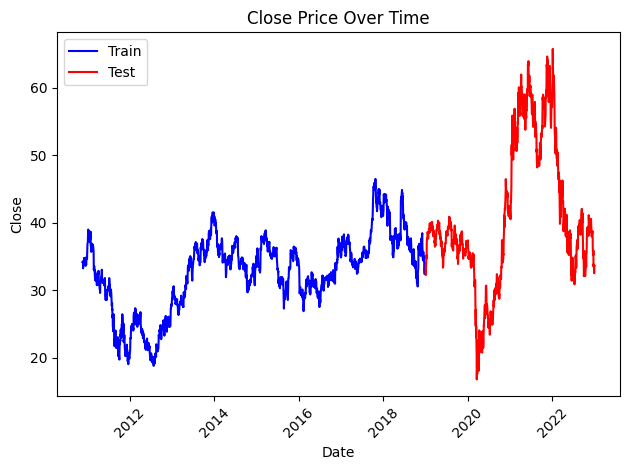

In [2]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GM',start_date,end_date,period,2019)
data.data_preprocess()

Running ring
Generation 1: Best fitness = 6.369084119649592  Average Fitness = 1.8542991449604262
Generation 2: Best fitness = 6.663076248054235  Average Fitness = 2.541178383303647
Generation 3: Best fitness = 6.663076248054235  Average Fitness = 3.0231033305264257
Generation 4: Best fitness = 6.663076248054235  Average Fitness = 3.5626595528655907
Generation 5: Best fitness = 7.685645479634758  Average Fitness = 3.936948034859213
Island 0 Migration -Left island 7 -Right island 1
Island 1 Migration -Left island 0 -Right island 2
Island 2 Migration -Left island 1 -Right island 3
Island 3 Migration -Left island 2 -Right island 4
Island 4 Migration -Left island 3 -Right island 5
Island 5 Migration -Left island 4 -Right island 6
Island 6 Migration -Left island 5 -Right island 7
Island 7 Migration -Left island 6 -Right island 0
Generation 6: Best fitness = 7.685645479634758  Average Fitness = 4.107684198376555
Generation 7: Best fitness = 8.193947691980357  Average Fitness = 4.693224065457

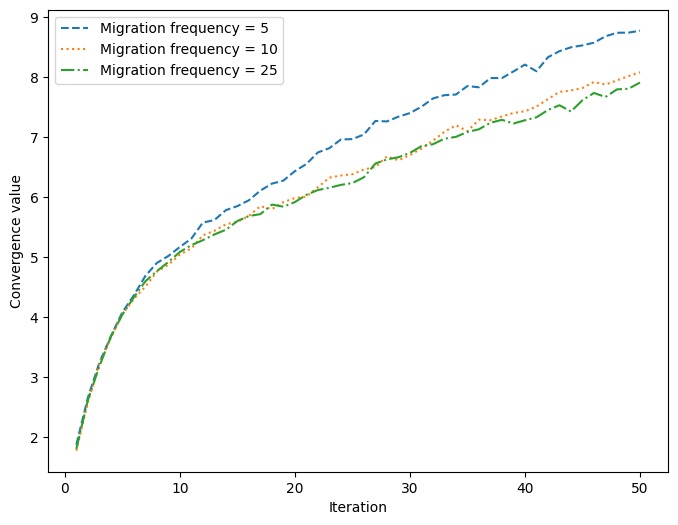

In [3]:
# ring
values = []
migration_freqs = [5  ,10, 25]
num_runs = 20
convergence_values = []
for i in migration_freqs:
    values = []
    for _ in range(num_runs):
        ga = IslandGGA(data=data.train_data,num_islands=8,m_iter= i,num_iter=50,n_migrants_rate=0.5,pSize=200,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy="ring")
        ga.evolve()
        values.append(ga.convergence_values)
    convergence_values.append(np.mean(values, axis=0))  # Average convergence values across runs

file_name = 'migration_freq_ring'
np.save(file_name,convergence_values)
line_styles = {
    5: "--",            # Migration rate 0.0 with circle markers
    10: ":",            # Migration rate 0.5 with "x" markers
    25: "-.",            # Migration rate 0.8 with square markers
}

plt.figure(figsize=(8, 6))
for i in range(len(migration_freqs)):
    migration_freq = migration_freqs[i]
    if migration_freq in line_styles:
        plt.plot(np.arange(1, 51), convergence_values[i], label=f'Migration frequency = {migration_freq}', linestyle=line_styles[migration_freq])

plt.xlabel('Iteration')
plt.ylabel('Average Fitness Value')
#plt.title('Convergence values for different migration rates')
plt.legend()
plt.show()

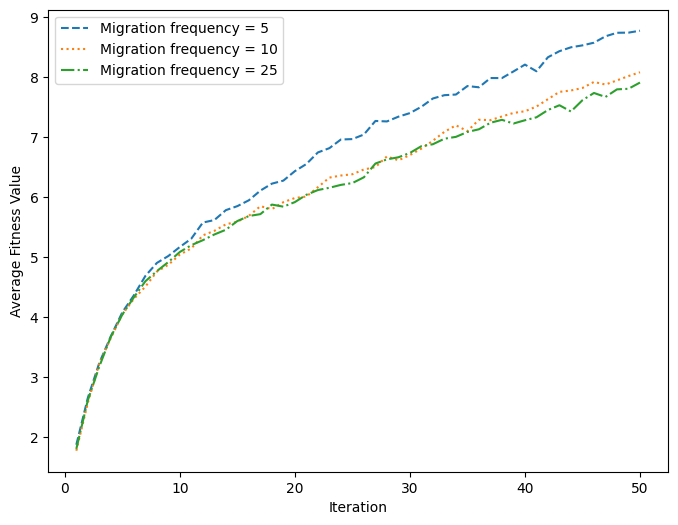

In [4]:

plt.figure(figsize=(8, 6))
for i in range(len(migration_freqs)):
    migration_freq = migration_freqs[i]
    if migration_freq in line_styles:
        plt.plot(np.arange(1, 51), convergence_values[i], label=f'Migration frequency = {migration_freq}', linestyle=line_styles[migration_freq])

plt.xlabel('Iteration')
plt.ylabel('Average Fitness Value')
#plt.title('Convergence values for different migration rates')
plt.legend()
plt.show()

Running multikuti
Generation 1: Best fitness = 7.60303967993178  Average Fitness = 1.6182522460777176
Generation 2: Best fitness = 8.38206048278502  Average Fitness = 2.396266487453939
Generation 3: Best fitness = 8.38206048278502  Average Fitness = 3.0758495698378336
Generation 4: Best fitness = 8.38206048278502  Average Fitness = 3.6296323296586817
Generation 5: Best fitness = 8.38206048278502  Average Fitness = 3.975366911266055
Island 0 Migration -Left island 7 -Right island 1
Island 1 Migration -Left island 0 -Right island 2
Island 2 Migration -Left island 1 -Right island 3
Island 3 Migration -Left island 2 -Right island 4
Island 4 Migration -Left island 3 -Right island 5
Island 5 Migration -Left island 4 -Right island 6
Island 6 Migration -Left island 5 -Right island 7
Island 7 Migration -Left island 6 -Right island 0
Generation 6: Best fitness = 9.02031550226171  Average Fitness = 4.40959343764204
Generation 7: Best fitness = 9.02031550226171  Average Fitness = 4.522585737480671

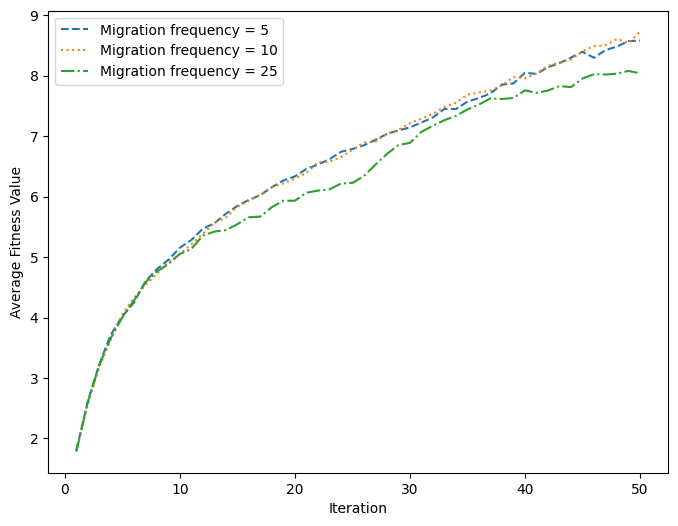

In [3]:
# multikuti
values = []
migration_freqs = [5  ,10, 25]
num_runs = 20
convergence_values = []
for i in migration_freqs:
    values = []
    for _ in range(num_runs):
        ga = IslandGGA(data=data.train_data,num_islands=8,m_iter= i,num_iter=50,n_migrants_rate=0.5,pSize=200,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy="multikuti")
        ga.evolve()
        values.append(ga.convergence_values)
    convergence_values.append(np.mean(values, axis=0))  # Average convergence values across runs

file_name = 'migration_freq_multikuti'
np.save(file_name,convergence_values)
line_styles = {
    5: "--",            # Migration rate 0.0 with circle markers
    10: ":",            # Migration rate 0.5 with "x" markers
    25: "-.",            # Migration rate 0.8 with square markers
}

plt.figure(figsize=(8, 6))
for i in range(len(migration_freqs)):
    migration_freq = migration_freqs[i]
    if migration_freq in line_styles:
        plt.plot(np.arange(1, 51), convergence_values[i], label=f'Migration frequency = {migration_freq}', linestyle=line_styles[migration_freq])

plt.xlabel('Iteration')
plt.ylabel('Average Fitness Value')
#plt.title('Convergence values for different migration rates')
plt.legend()
plt.show()